In [12]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd

SEED = 42

# Load the cleaned data
dataset_orig = pd.read_parquet ("./datasets/dataset_clean.parquet")

In [14]:
print (dataset_orig.head ())

     salary work_location           job_role             name phone_number
0   90000.0            UK  Software Engineer     Allison Hill   5128530491
1   65000.0           USA       Data Analyst      Noah Rhodes   8549470627
2  150000.0        Canada            Manager  Angie Henderson   3064600266
3   60000.0           USA    Sales Associate    Daniel Wagner   8234970854
4  200000.0           USA           Director  Cristian Santos   2898730319


In [15]:
print (dataset_orig.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salary         6684 non-null   float64
 1   work_location  6684 non-null   object 
 2   job_role       6684 non-null   object 
 3   name           6684 non-null   object 
 4   phone_number   6684 non-null   object 
dtypes: float64(1), object(4)
memory usage: 261.2+ KB
None


In [16]:
print (dataset_orig.describe ())

              salary
count    6684.000000
mean   115307.175194
std     52806.810881
min       350.000000
25%     70000.000000
50%    115000.000000
75%    160000.000000
max    250000.000000


In [17]:
unit_count = dataset_orig['work_location'].value_counts()
print(unit_count)
print ()

unit_count = dataset_orig['job_role'].value_counts()
print(unit_count)
print ()

work_location
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64

job_role
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64



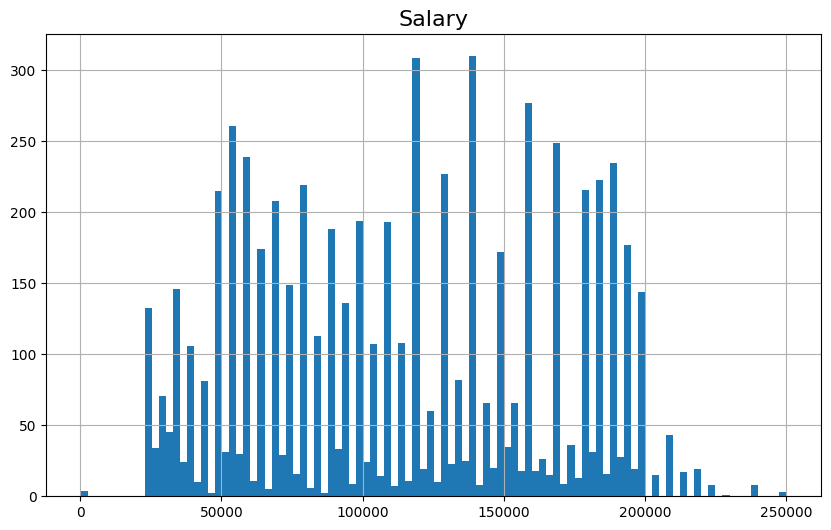

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_orig.hist(bins=100, figsize=(10, 6))
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title('Salary', fontsize=16)

plt.show()

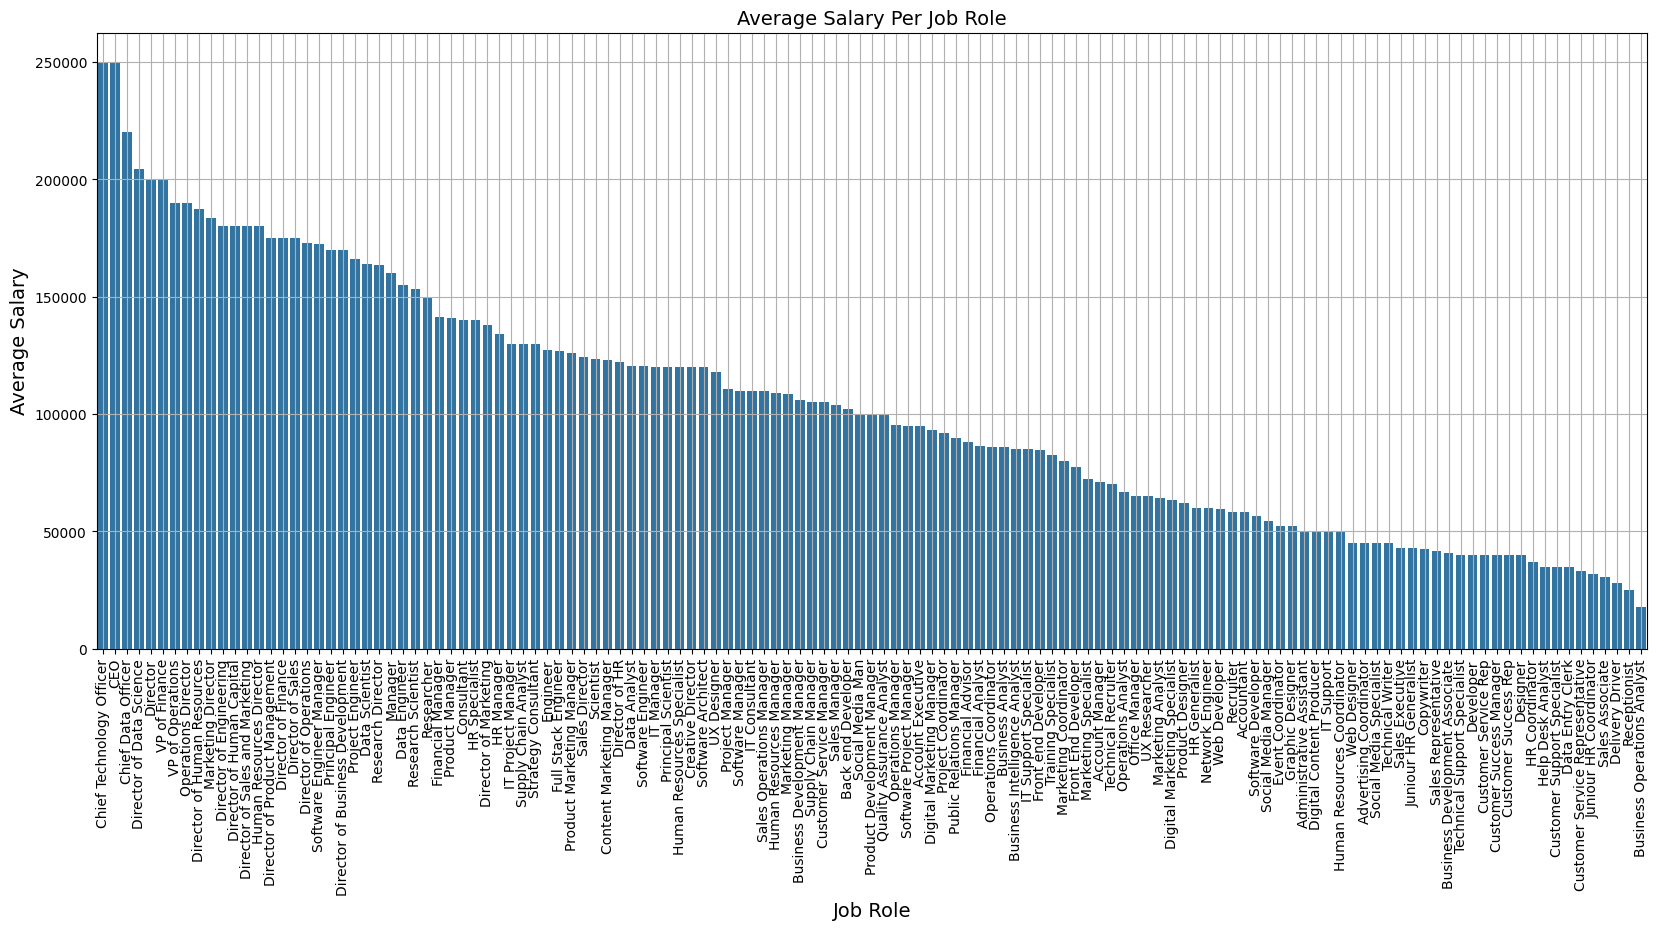

In [29]:
graph_data = pd.DataFrame (dataset_orig.groupby("job_role")["salary"].mean()).sort_values(by='salary', ascending=False)

plt.figure (figsize=(20,8))
plt.title('Average Salary Per Job Role')
sns.barplot(graph_data, x='job_role', y='salary', errorbar=None)
plt.xlabel('Job Role')
plt.ylabel('Average Salary')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [51]:
value_counts = dataset_orig['job_role'].value_counts()
rare_categories = value_counts[value_counts <= 1]

print ("Rare categoriies: ", len(rare_categories))
print (rare_categories)

Rare categoriies:  53
job_role
Advertising Coordinator             1
Software Manager                    1
IT Project Manager                  1
Quality Assurance Analyst           1
Director of Sales and Marketing     1
Account Executive                   1
Director of Business Development    1
Human Resources Specialist          1
Director of Human Capital           1
Data Entry Clerk                    1
Social Media Man                    1
VP of Operations                    1
Product Development Manager         1
Software Architect                  1
HR Specialist                       1
Director                            1
Developer                           1
Customer Service Rep                1
IT Support                          1
UX Researcher                       1
Researcher                          1
Customer Success Rep                1
IT Manager                          1
Business Intelligence Analyst       1
Help Desk Analyst                   1
Technical Support S

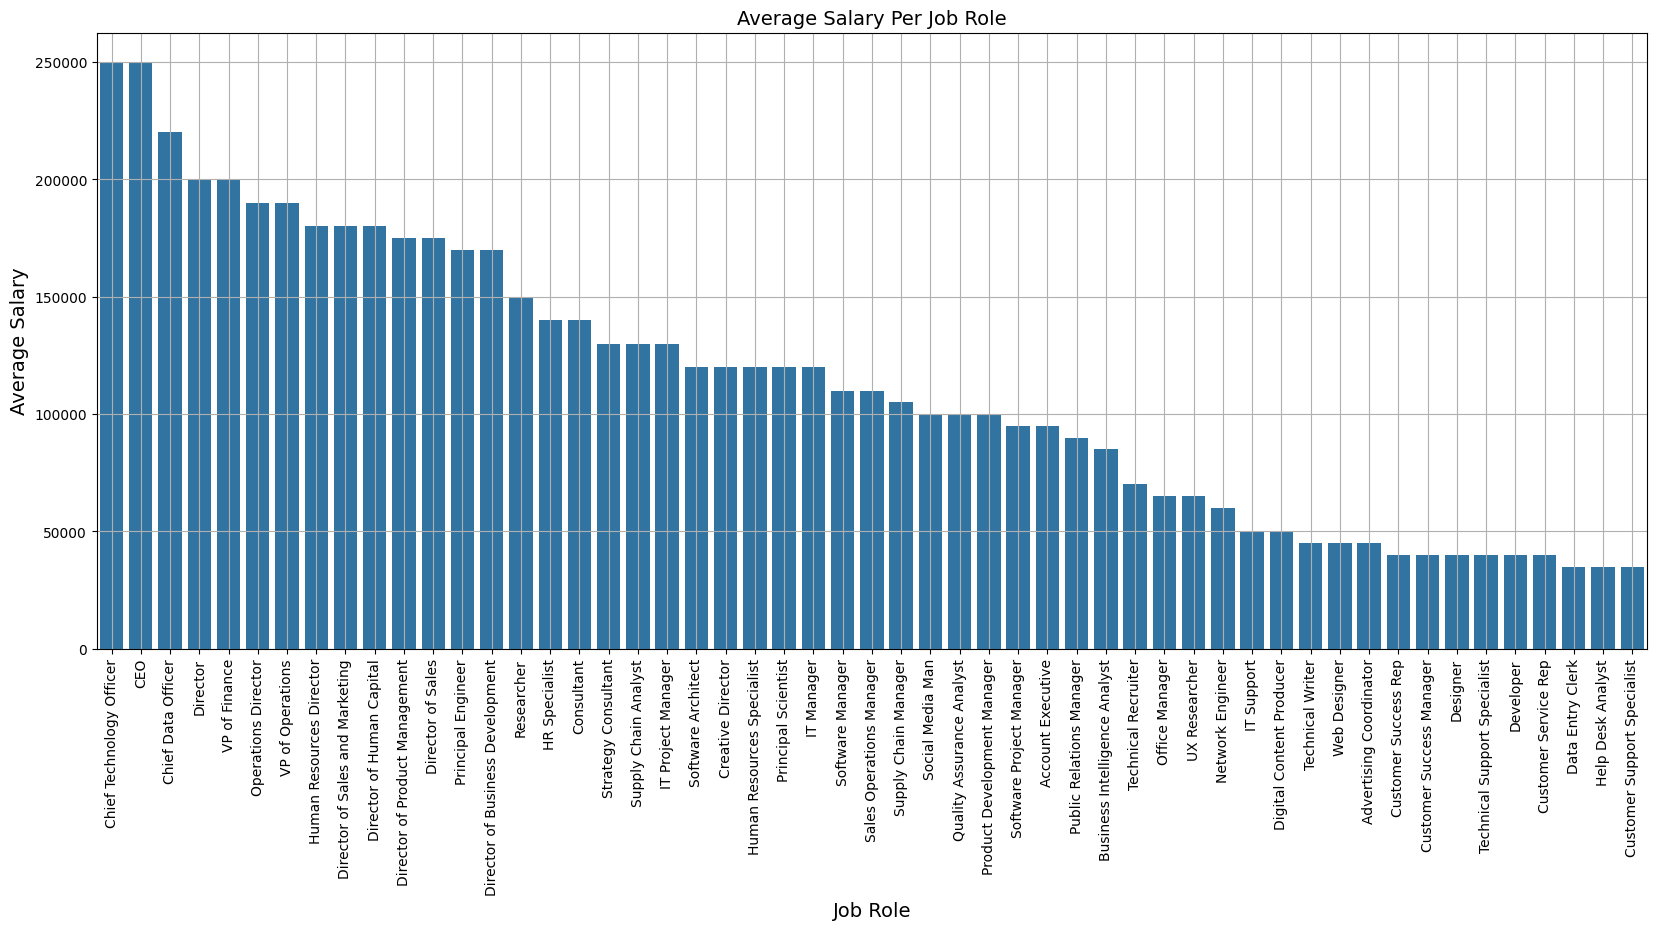

In [56]:
graph_data = pd.DataFrame (dataset_orig[dataset_orig["job_role"].isin(rare_categories.index)].groupby("job_role")["salary"].mean()).sort_values(by='salary', ascending=False)

plt.figure (figsize=(20,8))
plt.title('Average Salary Per Rare Job Role')
sns.barplot(graph_data, x='job_role', y='salary', errorbar=None)
plt.xlabel('Job Role')
plt.ylabel('Average Salary')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [58]:
print ("Average salary of rare job roles: ", graph_data["salary"].mean ())

Average salary of rare job roles:  112830.18867924529
